### TikTok commercial video advertisements detect! Who can make the accuracy 0.99?

### Introduction

The purpose of the project is to predict the label and make the accuracy 0.99?

For the prediction, we used Random Forest as the base model to see how good it will perform. Including Neural network  (sklearn's MLPClassifier) with basic 5 layers and this setting of neurons: (16,32,64,32,16) and the keras to build our models. We started with a base network with 6 layers.we added dropout, more layers, changing the number of neurons to make the model more complex. We are also trying different activation functions- relu.

For the Split test, the dataset has been separated into training and Testing data so that prediction can be done on the testing data. I also import Tableau that can make the visualization more feasible.
The technical aspects used for visualization are Matplolib, seaborn, including data manipulation: pandas, NumPy, modeling-Sklearn, Neural network & Keras.




### Important Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading In The Data

In [2]:
df= pd.read_csv("commercial_vedio_data.csv")

### Data Exploration
using the info function to look at the indexes, Datatype and Memory information

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129685 entries, 0 to 129684
Columns: 232 entries, Unnamed: 0 to labels
dtypes: float64(229), int64(3)
memory usage: 229.5 MB
None


In [4]:
df.info

<bound method DataFrame.info of         Unnamed: 0    1         2         3          4          5         6  \
0                0  123  1.316440  1.516003   5.605905   5.346760  0.013233   
1                1  124  0.966079  0.546420   4.046537   3.190973  0.008338   
2                2  109  2.035407  0.571643   9.551406   5.803685  0.015189   
3                3   86  3.206008  0.786326  10.092709   2.693058  0.013962   
4                4   76  3.135861  0.896346  10.348035   2.651010  0.020914   
...            ...  ...       ...       ...        ...        ...       ...   
129680      129680   41  0.558875  0.247396   2.279039   0.798749  0.023244   
129681      129681  105  6.594097  3.418464  17.372873   8.571255  0.020726   
129682      129682  100  1.299783  0.543502   5.095611   1.527174  0.018389   
129683      129683   60  0.571542  0.487061   2.218786   2.174240  0.018031   
129684      129684   25  1.949249  3.074548  11.921268  14.297340  0.017515   

               7   

Using df.head() Returns the first 5 rows of the dataframe.

In [5]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,959,1002,1016,1028,1048,1112,1119,4124,4125,labels
0,0,123,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,...,0.036017,0.006356,0.008475,NaN,0.002119,NaN,NaN,0.422334,0.663918,1
1,1,124,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,...,0.117647,0.006303,NaN,NaN,0.008403,NaN,NaN,0.332664,0.766184,1
2,2,109,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,...,0.062500,0.004808,NaN,NaN,0.009615,NaN,NaN,0.346674,0.225022,1
3,3,86,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,...,0.046296,0.012346,NaN,NaN,0.012346,0.003086,NaN,0.993323,0.840083,1
4,4,76,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,...,NaN,0.003521,NaN,NaN,0.045775,0.007042,NaN,0.341520,0.710470,1


Using df.tail() Returns the first 5 rows of the dataframe.

In [6]:
df.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,959,1002,1016,1028,1048,1112,1119,4124,4125,labels
129680,129680,41,0.558875,0.247396,2.279039,0.798749,0.023244,0.011390,0.057546,0.035940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190005,0.946195,1
129681,129681,105,6.594097,3.418464,17.372873,8.571255,0.020726,0.010193,0.085179,0.051084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166974,0.728715,1
129682,129682,100,1.299783,0.543502,5.095611,1.527174,0.018389,0.008418,0.104063,0.045564,...,NaN,0.023684,NaN,NaN,0.005263,NaN,NaN,0.928798,0.437874,1
129683,129683,60,0.571542,0.487061,2.218786,2.174240,0.018031,0.007570,0.122708,0.050065,...,NaN,0.022727,NaN,NaN,NaN,NaN,NaN,0.745411,0.260724,1
129684,129684,25,1.949249,3.074548,11.921268,14.297340,0.017515,0.009876,0.090000,0.051796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630468,0.345910,1


I used the describe() function to get a basic statistical summary about the data such as: Percentile, Mean, Median, Variance, Std and to determine anomaly in the data.

In [7]:
df.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,959,1002,1016,1028,1048,1112,1119,4124,4125,labels
count,129685.000000,129685.000000,129685.000000,129685.000000,129685.000000,129685.000000,129685.000000,129685.000000,129685.000000,129685.000000,...,62719.000000,53351.000000,41920.000000,1860.000000,55528.000000,13108.000000,217.000000,129685.000000,129685.000000,129685.000000
mean,64842.000000,106.400000,2.587003,1.601049,11.918077,8.264462,0.015218,0.009762,0.103230,0.056772,...,0.044993,0.040969,0.055489,0.003688,0.035440,0.006209,0.036149,0.500648,0.500378,0.268165
std,37436.979167,264.814882,2.179930,1.374998,9.068333,6.847135,0.005434,0.003281,0.037289,0.021509,...,0.056405,0.049836,0.069591,0.004812,0.043293,0.012654,0.075509,0.288909,0.288068,0.963377
min,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000059,0.000059,0.000073,0.000014,0.000007,0.000047,0.000271,0.000032,0.000003,-1.000000
25%,32421.000000,30.000000,0.947497,0.674715,5.380625,3.244237,0.012589,0.008073,0.083190,0.045150,...,0.011161,0.008621,0.009770,0.000836,0.009804,0.001208,0.004464,0.250215,0.251995,-1.000000
50%,64842.000000,49.000000,1.970185,1.343323,9.476908,6.584897,0.015709,0.010057,0.102859,0.054889,...,0.025000,0.023585,0.028226,0.001988,0.022727,0.002687,0.012500,0.501763,0.499753,1.000000
75%,97263.000000,96.000000,3.710244,2.163196,16.568928,11.572393,0.018552,0.012005,0.123875,0.066628,...,0.057143,0.056830,0.076539,0.004556,0.045455,0.006410,0.037500,0.751095,0.749926,1.000000
max,129684.000000,33871.000000,21.679216,37.363274,67.285736,63.396584,0.036905,0.021416,0.394551,0.246353,...,0.812500,0.637500,1.012500,0.050000,0.840909,0.223214,0.512500,0.999973,0.999997,1.000000


### Data Wrangling and Cleaning
We used isnull() to find the missing values in the dataset and use fillna to fill in the null values.

In [8]:
df.isnull()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,959,1002,1016,1028,1048,1112,1119,4124,4125,labels
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129680,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
129681,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
129682,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,True,False,False,False
129683,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,False,False,False


### To evaluate whether any value is missing in a Series

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum(axis=0)

Unnamed: 0         0
1                  0
2                  0
3                  0
4                  0
               ...  
1112          116577
1119          129468
4124               0
4125               0
labels             0
Length: 232, dtype: int64

Replace all null values with the mean

In [11]:
df = df.fillna(df.mean())


In [12]:
df.isnull()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,959,1002,1016,1028,1048,1112,1119,4124,4125,labels
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129683,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df = df.fillna(0)

In [14]:
df.isnull()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,959,1002,1016,1028,1048,1112,1119,4124,4125,labels
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129683,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Visualizing The Data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

To visualize the data and see the distribution of the labels, I plotted the distribution plot using seborn. We have more data points of positive class than the negative class.

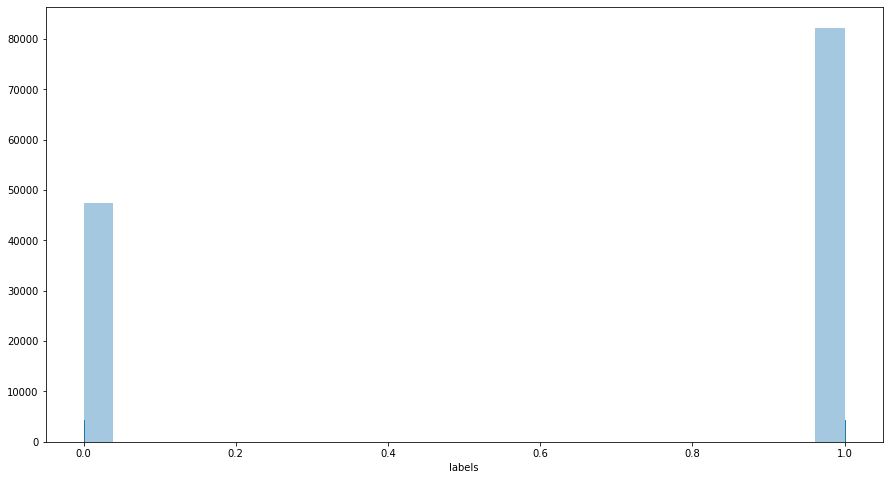

In [39]:
plt.figure(figsize=(15,8))
barplot=sns.distplot(df['labels'], kde=False, rug=True)

Now we plot the correlation matrix to see how variables are correlated with the target variable. We can see some of features are dependent on each other.

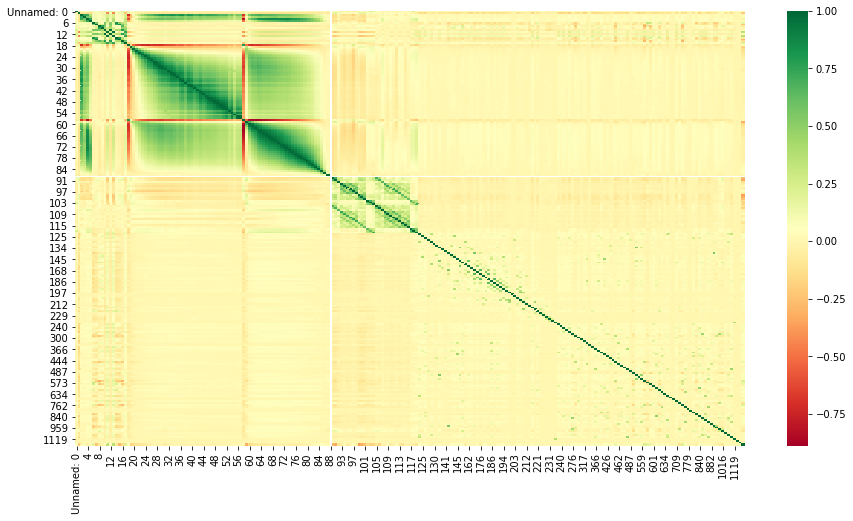

In [17]:
plt.figure(figsize=(15,8))
corr_plot = sns.heatmap(df.corr(),cmap="RdYlGn",annot=False)

In [18]:
df_corr=df.corr()
x=[]
for i in df_corr['labels']:
    x.append(i)

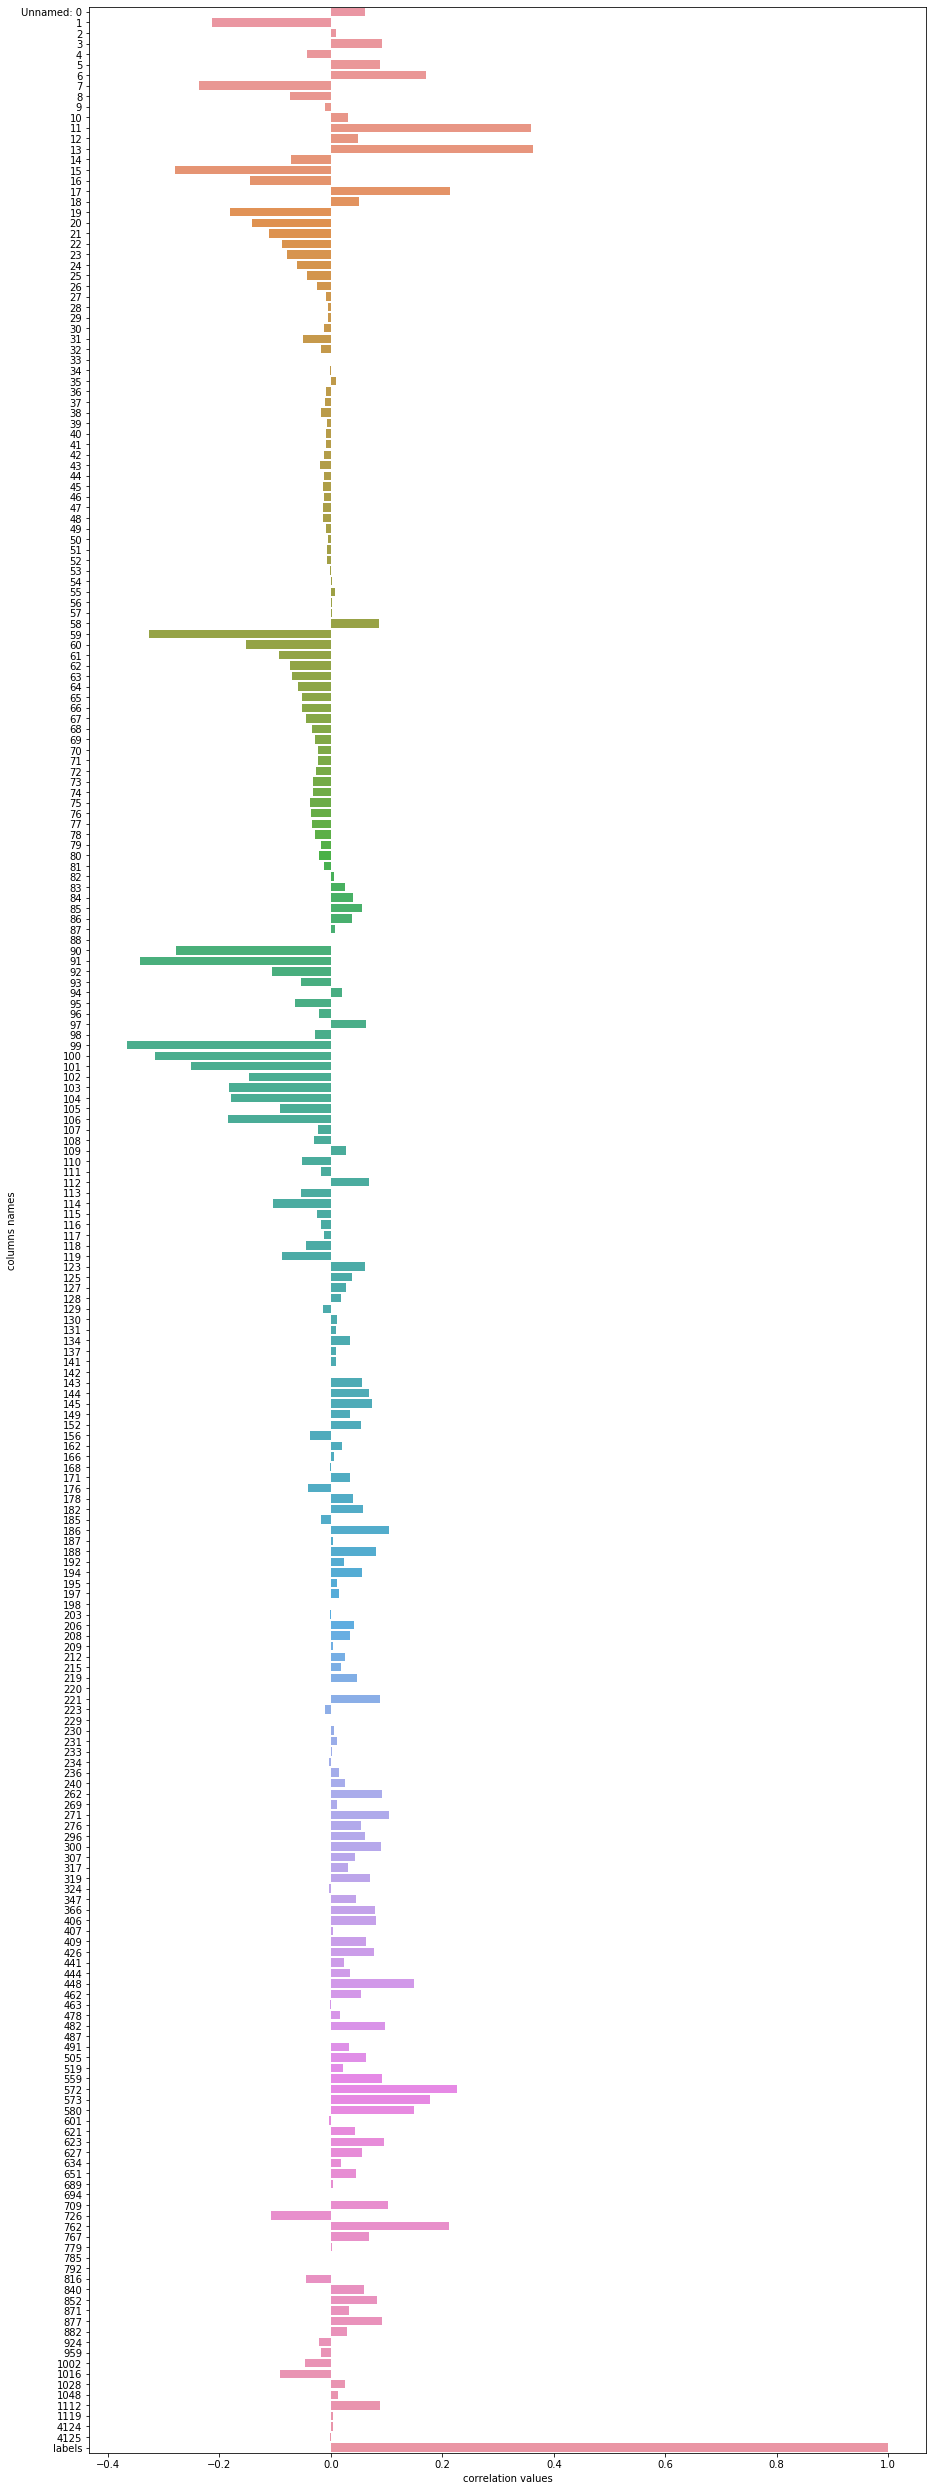

In [19]:
plt.figure(figsize=(15,45))
ax=sns.barplot(x =x , y = df_corr['labels'].index)
ax.set(xlabel='correlation values', ylabel='columns names')
plt.show()

This graph shows a relationship between correlation value and column name.

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
import numpy as np

In [22]:
df["labels"]

0         1
1         1
2         1
3         1
4         1
         ..
129680    1
129681    1
129682    1
129683    1
129684    1
Name: labels, Length: 129685, dtype: int64

In [23]:
# to see unique val
set(df['labels'].values)

{-1, 1}

In [24]:
df['labels'] = df['labels'].apply(lambda x:0 if x == -1 else x)

We changed the label of -1 to 0 to make it easy for us to feed the data to the models.

In [25]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=df.drop("labels",axis=1)

# Specify the target labels and flatten the array 
y=df["labels"]

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Using The Scaling Method to Standardize The Data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Evaluating Model Performance


In [ ]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest

In [29]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_tst = accuracy_score(y_test, pred)
print("testing accuracy", accuracy_tst)

testing accuracy 0.9571268843736747


We tried Random Forest as the base model to see how good it is performed. it performed quite well and resulted in 95% accuracy on the test set.

### Advantages
The random forest algorithm works well when the data sets  have both categorical and numerical features.
The random forest algorithm also works well when data has missing values or it has not been scaled 

### Disadvantages
A major disadvantage of random forests lies in their complexity. Random Forest required much more computational resources, owing to the large number of decision trees joined together. Due to their complexity, they require much more time to train than other comparable algorithms.


### Multi-Layer Perceptron (MLP) Classifier Algorithm

I used MLPClassifier to implement a multi-layer perceptron (MLP) algorithm that trains the model using  Backpropagation.      


In [ ]:
clf = MLPClassifier(alpha=1e-3,max_iter=500, hidden_layer_sizes = (16,32,64,32,16))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_tst = accuracy_score(y_test, pred)
print("testing accuracy", accuracy_tst)

In [31]:
print(X_train.shape)

(103748, 231)


### The advantages of using Multi-layer Perceptron are:

Capability to learn non-linear models.

Capability to learn models in real-time (on-line learning) using partial_fit.

### The disadvantages of Multi-layer Perceptron (MLP) include:

MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

MLP is sensitive to feature scaling.

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, ReLU, Activation, Dropout

Now we are trying the keras to build our own neural network. We started with a base network with 6 layers. Now we are trying adding dropout, adding more layers, changing the number of neurons to make the model more complex. We are also trying different activation functions- relu. 

In [33]:
model = Sequential()
model.add(Dense(64, input_dim=231,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(128,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(128,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(128,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer='normal'))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1 ,activation="sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                14848     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8

In [34]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, batch_size=128)

Epoch 1/500
811/811 [==============================] - 24s 30ms/step - loss: 0.3160 - accuracy: 0.8729 - val_loss: 0.2812 - val_accuracy: 0.8924
Epoch 2/500
811/811 [==============================] - 24s 29ms/step - loss: 0.2486 - accuracy: 0.9063 - val_loss: 0.2551 - val_accuracy: 0.8990
Epoch 3/500
811/811 [==============================] - 24s 29ms/step - loss: 0.2267 - accuracy: 0.9143 - val_loss: 0.2302 - val_accuracy: 0.9114
Epoch 4/500
811/811 [==============================] - 24s 29ms/step - loss: 0.2101 - accuracy: 0.9207 - val_loss: 0.2208 - val_accuracy: 0.9160
Epoch 5/500
811/811 [==============================] - 24s 29ms/step - loss: 0.1927 - accuracy: 0.9263 - val_loss: 0.2185 - val_accuracy: 0.9141
Epoch 6/500
811/811 [==============================] - 24s 29ms/step - loss: 0.1808 - accuracy: 0.9308 - val_loss: 0.2134 - val_accuracy: 0.9182
Epoch 7/500
811/811 [==============================] - 24s 29ms/step - loss: 0.1707 - accuracy: 0.9338 - val_loss: 0.2100 - val_ac

811/811 [==============================] - 36s 45ms/step - loss: 0.0389 - accuracy: 0.9838 - val_loss: 0.6360 - val_accuracy: 0.9386
Epoch 114/500
811/811 [==============================] - 35s 43ms/step - loss: 0.0475 - accuracy: 0.9836 - val_loss: 0.3441 - val_accuracy: 0.9367
Epoch 115/500
811/811 [==============================] - 35s 43ms/step - loss: 0.0332 - accuracy: 0.9856 - val_loss: 0.4446 - val_accuracy: 0.9399
Epoch 116/500
811/811 [==============================] - 34s 42ms/step - loss: 0.0308 - accuracy: 0.9862 - val_loss: 0.6025 - val_accuracy: 0.9411
Epoch 117/500
811/811 [==============================] - 35s 43ms/step - loss: 0.0349 - accuracy: 0.9853 - val_loss: 0.4535 - val_accuracy: 0.9397
Epoch 118/500
811/811 [==============================] - 38s 47ms/step - loss: 0.0314 - accuracy: 0.9863 - val_loss: 0.4596 - val_accuracy: 0.9386
Epoch 119/500
811/811 [==============================] - 42s 52ms/step - loss: 0.0324 - accuracy: 0.9865 - val_loss: 0.4773 - val_ac

Epoch 169/500
811/811 [==============================] - 24s 30ms/step - loss: 0.0337 - accuracy: 0.9860 - val_loss: 0.5075 - val_accuracy: 0.9416
Epoch 170/500
811/811 [==============================] - 24s 29ms/step - loss: 0.0246 - accuracy: 0.9886 - val_loss: 0.8917 - val_accuracy: 0.9414
Epoch 171/500
811/811 [==============================] - 18s 22ms/step - loss: 0.0423 - accuracy: 0.9842 - val_loss: 0.2618 - val_accuracy: 0.9323
Epoch 172/500
811/811 [==============================] - 19s 24ms/step - loss: 0.0392 - accuracy: 0.9836 - val_loss: 0.7313 - val_accuracy: 0.9398
Epoch 173/500
811/811 [==============================] - 22s 27ms/step - loss: 0.0246 - accuracy: 0.9889 - val_loss: 0.8906 - val_accuracy: 0.9412
Epoch 174/500
811/811 [==============================] - 21s 26ms/step - loss: 0.0243 - accuracy: 0.9884 - val_loss: 1.0763 - val_accuracy: 0.9420
Epoch 175/500
811/811 [==============================] - 24s 29ms/step - loss: 0.0245 - accuracy: 0.9887 - val_loss: 1

Epoch 225/500
811/811 [==============================] - 15s 19ms/step - loss: 0.0215 - accuracy: 0.9894 - val_loss: 0.5099 - val_accuracy: 0.9420
Epoch 226/500
811/811 [==============================] - 17s 21ms/step - loss: 0.0231 - accuracy: 0.9892 - val_loss: 0.4670 - val_accuracy: 0.9419
Epoch 227/500
811/811 [==============================] - 18s 23ms/step - loss: 0.0230 - accuracy: 0.9892 - val_loss: 0.4382 - val_accuracy: 0.9406
Epoch 228/500
811/811 [==============================] - 18s 22ms/step - loss: 0.0245 - accuracy: 0.9884 - val_loss: 0.4937 - val_accuracy: 0.9413
Epoch 229/500
811/811 [==============================] - 18s 22ms/step - loss: 0.0240 - accuracy: 0.9888 - val_loss: 0.5980 - val_accuracy: 0.9416
Epoch 230/500
811/811 [==============================] - 18s 23ms/step - loss: 0.0234 - accuracy: 0.9891 - val_loss: 0.4897 - val_accuracy: 0.9407
Epoch 231/500
811/811 [==============================] - 18s 23ms/step - loss: 0.0245 - accuracy: 0.9887 - val_loss: 0

Epoch 281/500
811/811 [==============================] - 26s 32ms/step - loss: 0.0228 - accuracy: 0.9894 - val_loss: 0.7347 - val_accuracy: 0.9417
Epoch 282/500
811/811 [==============================] - 27s 33ms/step - loss: 0.0234 - accuracy: 0.9891 - val_loss: 0.5000 - val_accuracy: 0.9407
Epoch 283/500
811/811 [==============================] - 29s 36ms/step - loss: 0.0245 - accuracy: 0.9888 - val_loss: 0.5189 - val_accuracy: 0.9395
Epoch 284/500
811/811 [==============================] - 29s 36ms/step - loss: 0.0269 - accuracy: 0.9881 - val_loss: 0.4971 - val_accuracy: 0.9421
Epoch 285/500
811/811 [==============================] - 30s 37ms/step - loss: 0.0242 - accuracy: 0.9896 - val_loss: 0.8434 - val_accuracy: 0.9431
Epoch 286/500
811/811 [==============================] - 26s 32ms/step - loss: 0.0238 - accuracy: 0.9892 - val_loss: 0.4351 - val_accuracy: 0.9424
Epoch 287/500
811/811 [==============================] - 30s 37ms/step - loss: 0.0238 - accuracy: 0.9892 - val_loss: 0

Epoch 337/500
811/811 [==============================] - 36s 44ms/step - loss: 0.0670 - accuracy: 0.9823 - val_loss: 0.2774 - val_accuracy: 0.9391
Epoch 338/500
811/811 [==============================] - 25s 31ms/step - loss: 0.0263 - accuracy: 0.9886 - val_loss: 0.4619 - val_accuracy: 0.9424
Epoch 339/500
811/811 [==============================] - 26s 32ms/step - loss: 0.0209 - accuracy: 0.9901 - val_loss: 0.5619 - val_accuracy: 0.9432
Epoch 340/500
811/811 [==============================] - 25s 30ms/step - loss: 0.0289 - accuracy: 0.9877 - val_loss: 0.5627 - val_accuracy: 0.9409
Epoch 341/500
811/811 [==============================] - 30s 37ms/step - loss: 0.0269 - accuracy: 0.9885 - val_loss: 0.4130 - val_accuracy: 0.9412
Epoch 342/500
811/811 [==============================] - 32s 39ms/step - loss: 0.0228 - accuracy: 0.9895 - val_loss: 0.4411 - val_accuracy: 0.9432
Epoch 343/500
811/811 [==============================] - 26s 32ms/step - loss: 0.0201 - accuracy: 0.9904 - val_loss: 0

Epoch 448/500
811/811 [==============================] - 23s 29ms/step - loss: 0.0209 - accuracy: 0.9905 - val_loss: 0.7329 - val_accuracy: 0.9409
Epoch 449/500
811/811 [==============================] - 23s 28ms/step - loss: 0.0218 - accuracy: 0.9900 - val_loss: 0.4805 - val_accuracy: 0.9423
Epoch 450/500
811/811 [==============================] - 23s 29ms/step - loss: 0.0196 - accuracy: 0.9907 - val_loss: 0.4703 - val_accuracy: 0.9395
Epoch 451/500
811/811 [==============================] - 24s 29ms/step - loss: 0.0239 - accuracy: 0.9896 - val_loss: 0.4211 - val_accuracy: 0.9410
Epoch 452/500
811/811 [==============================] - 23s 28ms/step - loss: 0.0248 - accuracy: 0.9894 - val_loss: 0.6320 - val_accuracy: 0.9390
Epoch 453/500
811/811 [==============================] - 23s 29ms/step - loss: 0.0228 - accuracy: 0.9897 - val_loss: 0.4047 - val_accuracy: 0.9397
Epoch 454/500
811/811 [==============================] - 23s 29ms/step - loss: 0.0256 - accuracy: 0.9889 - val_loss: 0

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=231, activation='relu',kernel_initializer='normal'))
model.add(Dense(128, activation='relu',kernel_initializer='normal'))
model.add(Dense(64, activation='relu',kernel_initializer='normal'))
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
#model.add(Dense(16, activation='relu',kernel_initializer='normal'))
model.add(Dense(1 ,activation="sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

### Summary of Findings
The model aims to predict the accuracy of 0.99. For the prediction, We tried Random Forest as the base model to see how good it is performed. it performed quite well and resulted in 95% accuracy on the test set.  


We also use keras to build our neural network. We started with a base network with 6 layers. To make the model more complex; we included dropout, more layers, changing the number of neurons and using different activation functions- relu
This model also performed well with an accuracy of 0.9362

